<a href="https://colab.research.google.com/github/akomp22/Reinforcment_learning_hungry_geese_kaggle/blob/main/hungree_geese_a3c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle_environments

     |████████████████████████████████| 676 kB 7.6 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.3 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import threading
import cv2
import numpy as np
import gym
import random
import time
import multiprocessing
 
import tensorflow as tf
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.layers import (Add, Conv2D, Dense, Flatten, Input,
                                     Lambda, Subtract,MaxPool2D,Concatenate,BatchNormalization,Activation,GlobalAveragePooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow_probability as tfp
import tensorflow.keras.losses as kls

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
 
import matplotlib.pyplot as plt

import operator
from math import ceil,log2
import pandas as pd
import os

from numpy import savetxt

Loading environment football failed: No module named 'gfootball'


In [ ]:
import cv2
import numpy as np
import gym
import random
import time
 
import tensorflow as tf
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.layers import (Add, Conv2D, Dense, Flatten, Input,
                                     Lambda, Subtract,MaxPool2D,Concatenate,BatchNormalization,Activation,GlobalAveragePooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
 
from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
 
import matplotlib.pyplot as plt

import operator
from math import ceil,log2
import pandas as pd
import os

In [ ]:
!ls /content/drive/My/Drive/Trained_models/Trained_models/best_model1/*.py
!cat '/content/drive/My Drive/Trained_models/Trained_models/best_model1/main.py'

import sys
sys.path.insert(0,'/content/drive/My Drive/Trained_models/Trained_models/best_model1')

ext_folder = '/content/drive/My Drive/Trained_models/Trained_models/best_model1'
model_name = 'model_weights.ckp'
sys.path.append(ext_folder) 
from model import create_Agent


global net1
net1 = create_Agent()
net1.model1.load_weights(os.path.join(ext_folder, model_name))
def base_agent1(obs,conf):
    return net1.play_agent(obs,conf)

global net2
net2 = create_Agent()
net2.model1.load_weights(os.path.join(ext_folder, model_name))
def base_agent2(obs,conf):
    return net2.play_agent(obs,conf)

ls: cannot access '/content/drive/My/Drive/Trained_models/Trained_models/best_model1/*.py': No such file or directory
import cv2
import numpy as np
import gym
import random
import time
import sys
import os
 
import tensorflow as tf
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.layers import (Add, Conv2D, Dense, Flatten, Input,
                                     Lambda, Subtract,MaxPool2D,Concatenate)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
 
from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
 
import matplotlib.pyplot as plt


ext_folder = '/kaggle_simulations/agent/'
model_name = 'model_weights.ckp'
sys.path.append(ext_folder) 

import tensorflow as tf
from model import create_Agent


global net
net = create_Agent()
net.model1.load_weights(os.path.join(ext_folder, model_name))

def agent(obs,conf):
    

In [ ]:
!ls /content/drive/My/Drive/Trained_models/Trained_models/best_model2/*.py
!cat '/content/drive/My Drive/Trained_models/Trained_models/best_model2/main2.py'

import sys
sys.path.insert(0,'/content/drive/My Drive/Trained_models/Trained_models/best_model2')

ext_folder = '/content/drive/My Drive/Trained_models/Trained_models/best_model2'
model_name = 'model_weights.ckp'
sys.path.append(ext_folder) 
from model2 import create_Agent as cA


global net3
net3 = cA()
net3.model.load_weights(os.path.join(ext_folder, model_name))
def base_agent3(obs,conf):
    return net3.play_agent(obs,conf)

global net4
net4 = cA()
net4.model.load_weights(os.path.join(ext_folder, model_name))
def base_agent4(obs,conf):
    return net4.play_agent(obs,conf)

ls: cannot access '/content/drive/My/Drive/Trained_models/Trained_models/best_model2/*.py': No such file or directory
import cv2
import numpy as np
import gym
import random
import time
import sys
import os
 
import tensorflow as tf
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.layers import (Add, Conv2D, Dense, Flatten, Input,
                                     Lambda, Subtract,MaxPool2D,Concatenate,BatchNormalization,Activation,GlobalAveragePooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
 
from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
 
import matplotlib.pyplot as plt


ext_folder = '/kaggle_simulations/agent/'
model_name = 'model_weights.ckp'
sys.path.append(ext_folder) 

import tensorflow as tf
from model import create_Agent


global net
net = create_Agent()
net.model.load_weights(os.path.join

In [ ]:
def transform_observation2(obs,conf):
    rows = conf['rows']
    columns = conf['columns']
    line_me = np.zeros((rows*columns))
    line_oponents = np.zeros((rows*columns))
    line_food = np.zeros((rows*columns))
    index = obs['index']
    for i in range(0,len(obs['geese'])):
      if i!=index:
        line_oponents[obs['geese'][i]] = 1
    line_me[obs['geese'][index]] = 1
    line_food[obs['food']] = 1
    image1 = np.reshape(line_me,(rows,columns,1))
    image2 = np.reshape(line_oponents,(rows,columns,1))
    image3 = np.reshape(line_food,(rows,columns,1))
    image = np.concatenate((image1,image2,image3),axis = 2)
    return image

In [ ]:
def TorusConv2D(x, ch, kernel, padding="same", strides=1):
    x = Lambda(lambda x: tf.tile(x, (1,3,3,1)), 
               output_shape=lambda input_shape: (None, 3*input_shape[1], 3*input_shape[2], input_shape[3]))(x)
    
    x = Conv2D(ch, kernel, padding=padding, strides=strides)(x)
    
    x = Lambda(lambda x: x[:,int(x.shape[1]/3):2*int(x.shape[1]/3), int(x.shape[2]/3):2*int(x.shape[2]/3),:], 
               output_shape=lambda input_shape: (None, int(input_shape[1]/3), int(input_shape[2]/3), input_shape[3]))(x)
    return x
 
def conv_bn_relu(x0, ch, kernel, padding="same", strides=1, add=False):
    x = TorusConv2D(x0, ch, kernel, padding=padding, strides=strides)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    if add:
        x = Add()([x0, x])
    return x
 
def build_Torus_network(n_outputs, learning_rate=0.00001, input_shape=(7, 11, 6),last_activation = None):
    input = Input(input_shape)
    x = conv_bn_relu(input, 32, 3)
    
    # for i in range(layers):
    x = conv_bn_relu(x, 32, 3, add=True)
    x = conv_bn_relu(x, 32, 3, add=True)
    x = conv_bn_relu(x, 64, 3, add=False)
    x = conv_bn_relu(x, 64, 3, add=True)
    x = conv_bn_relu(x, 64, 3, add=True)
    x = conv_bn_relu(x, 128, 3, add=False)
    x = conv_bn_relu(x, 128, 3, add=True)
    x = conv_bn_relu(x, 128, 3, add=True)
    x = conv_bn_relu(x, 256, 3, add=False)
    
    
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(512,activation='relu')(x)

    output = Dense(n_outputs,activation = last_activation)(x)   
    model = Model(input, output)
    model.compile(Adam(learning_rate), loss=tf.keras.losses.Huber()) 
    
    return model

In [ ]:
model = build_Torus_network(n_outputs=4, learning_rate=0.00001, input_shape=(7, 11, 6))
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 7, 11, 6)]   0                                            
__________________________________________________________________________________________________
lambda_220 (Lambda)             (None, 21, 33, 6)    0           input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_120 (Conv2D)             (None, 21, 33, 32)   1760        lambda_220[0][0]                 
__________________________________________________________________________________________________
lambda_221 (Lambda)             (None, 7, 11, 32)    0           conv2d_120[0][0]                 
___________________________________________________________________________________________

In [ ]:
 class Agent():
  def __init__(self,actor,critic,n_actions,gamma,entropy_param = 0.001):
    self.actor = actor
    self.critic = critic
    self.n_actions = n_actions
    self.gamma = gamma
    self.entropy_param = entropy_param
    self.prev_state = 0
    self.prev_action=5
#     np.random.seed(0)

  def get_action(self,state):
      prob = self.actor.predict_on_batch(np.expand_dims(state,axis = 0))[0]
      dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
      action = dist.sample()
      return int(np.array(action))

  def play(self,obs,conf):
    if type(self.prev_state)==int:
        state = np.repeat(transform_observation2(obs,conf),2,axis=2)
    else :
        frame=transform_observation2(obs,conf)
        state=np.append(self.prev_state[:,:,3:],frame,axis=2)
    action=self.get_action(state)
    action_name=action_num_to_name(correct_action(action,self.prev_action))
    self.prev_state=state
    self.prev_action=correct_action(action,self.prev_action)
    return action_name
 
    
 
  def actor_loss(self, probs, actions, td):
      
      probability = []
      log_probability= []
      for pb,a in zip(probs,actions):
        dist = tfp.distributions.Categorical(probs=pb, dtype=tf.float32)
        log_prob = dist.log_prob(a)
        prob = dist.prob(a)
        probability.append(prob)
        log_probability.append(log_prob)

      # print(probability)
      # print(log_probability)

      p_loss= []
      e_loss = []
      td = td.numpy()
      #print(td)
      for pb, t, lpb in zip(probability, td, log_probability):
                      t =  tf.constant(t)
                      policy_loss = tf.math.multiply(lpb,t)
                      entropy_loss = tf.math.negative(tf.math.multiply(pb,lpb))
                      p_loss.append(policy_loss)
                      e_loss.append(entropy_loss)
      p_loss = tf.stack(p_loss)
      e_loss = tf.stack(e_loss)
      p_loss = tf.reduce_mean(p_loss)
      e_loss = tf.reduce_mean(e_loss)
      # print(p_loss)
      # print(e_loss)
      loss = -p_loss - self.entropy_param * e_loss
      #print(loss)
      return loss

  def learn(self, states, actions, discnt_rewards):
    discnt_rewards = tf.reshape(discnt_rewards, (len(discnt_rewards),))
    
    with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
        p = self.actor(states, training=True)
        v =  self.critic(states,training=True)
        v = tf.reshape(v, (len(v),))
        td = tf.math.subtract(discnt_rewards, v)
        # print(discnt_rewards)
        # print(v)
        #print(td.numpy())
        a_loss = self.actor_loss(p, actions, td)
        c_loss = 0.5*kls.mean_squared_error(discnt_rewards, v)
    grads1 = tape1.gradient(a_loss, self.actor.trainable_variables)
    grads2 = tape2.gradient(c_loss, self.critic.trainable_variables)
    agent.actor.optimizer.apply_gradients(zip(grads1, self.actor.trainable_variables))
    agent.critic.optimizer.apply_gradients(zip(grads2, self.critic.trainable_variables))
    return a_loss, c_loss

In [ ]:
def correct_action(action,prev_action):
  if action == (prev_action+2)%4 and prev_action!=5:
    action = prev_action
  return (action)

In [ ]:
def action_num_to_name(num):
    # act_dict = ['NORTH','WEST','SOUTH','EAST']
    # return act_dict[num]
    if num==0:
        return('NORTH')
    if num==1:
        return('WEST')
    if num==2:
        return('SOUTH')
    if num==3:
        return('EAST')

In [ ]:
class Agent_kag():
  def __init__(self):
    self.prev_action=Action.EAST.name

  def play(self,obs_dict, config_dict):
      """This agent always moves toward observation.food[0] but does not take advantage of board wrapping"""
      prev_action =0
      observation = Observation(obs_dict)
      configuration = Configuration(config_dict)
      player_index = observation.index
      player_goose = observation.geese[player_index]
      player_head = player_goose[0]
      player_row, player_column = row_col(player_head, configuration.columns)
      food = observation.food[0]
      food_row, food_column = row_col(food, configuration.columns)
  
      if food_row > player_row:
        if self.prev_action==Action.NORTH.name:
          if np.random.rand(1) < 0.5:
            self.prev_action = Action.EAST.name
            return Action.EAST.name
          else :
            self.prev_action = Action.WEST.name
            return Action.WEST.name
        else:
          self.prev_action = Action.SOUTH.name
          return Action.SOUTH.name

      elif food_row < player_row:
        if self.prev_action==Action.SOUTH.name:
          if np.random.rand(1) < 0.5:
            self.prev_action = Action.EAST.name
            return Action.EAST.name
          else :
            self.prev_action = Action.WEST.name
            return Action.WEST.name
        else:
          self.prev_action = Action.NORTH.name
          return Action.NORTH.name

      elif food_column > player_column:
        if self.prev_action==Action.WEST.name:
          if np.random.rand(1) < 0.5:
            self.prev_action = Action.NORTH.name
            return Action.NORTH.name
          else :
            self.prev_action = Action.SOUTH.name
            return Action.SOUTH.name
        else:
          self.prev_action = Action.EAST.name
          return Action.EAST.name

      else :
        if self.prev_action==Action.EAST.name:
          if np.random.rand(1) < 0.5:
            self.prev_action = Action.NORTH.name
            return Action.NORTH.name
          else :
            self.prev_action = Action.SOUTH.name
            return Action.SOUTH.name
        else:
          self.prev_action = Action.WEST.name
          return Action.WEST.name

def go_west_agent(obs, conf):
    return Action.WEST.name  # "WEST"

In [ ]:
class CustomReward():
  def __init__(self,shoarten_reward = 0,eat_reward = 1,win_reward = 0,loose_reward = 0,minus_opponent_reward = 0):
    self.my_old_length  = 1
    self.geese_out_old = 0
    self.eat_reward = eat_reward
    self.shoarten_reward = shoarten_reward
    self.win_reward = win_reward
    self.loose_reward = loose_reward
    self.minus_opponent_reward = minus_opponent_reward
 
  def get_reward(self,obs,terminal):
    reward = 0
    self.my_length = len(obs['geese'][obs['index']])
    if terminal == False:
      geese_out = len([i for i, x in enumerate(obs.geese) if x == []])
      if geese_out > self.geese_out_old:
        reward = reward + (geese_out-self.geese_out_old)*self.minus_opponent_reward
        self.geese_out_old = geese_out
      if self.my_length==self.my_old_length+1:
        reward = reward+self.eat_reward
      if self.my_length==self.my_old_length-1:
        reward = reward+self.shoarten_reward
      self.my_old_length = self.my_length
 
    if terminal == True:
      if obs['geese'][obs['index']] == []:
        reward = self.loose_reward
      else:
        reward = self.win_reward
 
    return reward
 
  def reset(self):
    self.my_old_length  = 1
    self.geese_out_old = 0

In [ ]:
def reward_preprocess(states, actions, rewards, gamma):
    discounted_rewards = []
    R = 0
    for r in rewards[::-1]:
      R = r + gamma*R
      discounted_rewards.append(R)
    discounted_rewards = discounted_rewards[::-1]
    states = np.array(states, dtype=np.float32)
    actions = np.array(actions, dtype=np.int32)
    discounted_rewards = np.array(discounted_rewards, dtype=np.float32)

    return states, actions, discounted_rewards

In [ ]:
def plot_progress(data,f=200):
  if type(data)==str:
    d = pd.read_csv(data)
  else:
    d = data
  k = []
  for i in range(0,len(d),f):
    k.append(np.mean(d[i:i+f]))
  plt.plot(k)
  plt.grid()
  plt.show()

In [ ]:
# WEIGHT_SAVE_FREQ = 1000
MAX_EPISODE_LENGTH = 100000

LEARNING_RATE = 0.0001
GAMMA = 0.99
ENTROPY_PARAM =0.1
NUM_EPOCHS = 100000
SAVE_FREQ_EP = 1000
SAVE_DIRR = '/content/drive/My Drive/ML/RL/Hungry_geese A3C/'
UPDATE_EPOCHS = 10
OPONENT_UPDATE_EPOCHS = 1000
MAX_BATCH_SIZE = 1000 

n_actions = 4 
# num_workers = 2
input_shape = (7, 11, 6)


shoarten_reward = 0
eat_reward = 1
win_reward = 0
loose_reward = 0
minus_opponent_reward = 0
reward_args = (shoarten_reward,eat_reward,win_reward,loose_reward,minus_opponent_reward)


In [ ]:
actor = build_Torus_network(n_actions, learning_rate=LEARNING_RATE,input_shape = input_shape,last_activation='softmax')
critic = build_Torus_network(1, learning_rate = LEARNING_RATE,input_shape = input_shape)
agent = Agent(actor,critic,n_actions,GAMMA,entropy_param = ENTROPY_PARAM)

actor1 = build_Torus_network(n_actions, learning_rate=LEARNING_RATE,input_shape = input_shape,last_activation='softmax')
critic1 = build_Torus_network(1, learning_rate = LEARNING_RATE,input_shape = input_shape)
agent1 = Agent(actor1,critic1,n_actions,GAMMA)

actor2 = build_Torus_network(n_actions, learning_rate=LEARNING_RATE,input_shape = input_shape,last_activation='softmax')
critic2 = build_Torus_network(1, learning_rate = LEARNING_RATE,input_shape = input_shape)
agent2 = Agent(actor2,critic2,n_actions,GAMMA)

actor3 = build_Torus_network(n_actions, learning_rate=LEARNING_RATE,input_shape = input_shape,last_activation='softmax')
critic3 = build_Torus_network(1, learning_rate = LEARNING_RATE,input_shape = input_shape)
agent3 = Agent(actor3,critic3,n_actions,GAMMA)

env = make("hungry_geese", debug=False)
agent_kag1 = Agent_kag()
trainer = env.train([None,  base_agent1,  base_agent3,  agent_kag1.play])

conf = env.configuration

Game number: 000050      Frame number: 00001117  Average reward: 0.6  Time taken: 31.3s  Episode steps: 22.3
Game number: 000100      Frame number: 00002194  Average reward: 0.6  Time taken: 31.2s  Episode steps: 21.9
Game number: 000150      Frame number: 00003459  Average reward: 0.6  Time taken: 34.7s  Episode steps: 23.1
Game number: 000200      Frame number: 00004860  Average reward: 0.7  Time taken: 39.2s  Episode steps: 24.3
Game number: 000250      Frame number: 00006202  Average reward: 0.7  Time taken: 37.1s  Episode steps: 25.4
Game number: 000300      Frame number: 00007361  Average reward: 0.8  Time taken: 33.5s  Episode steps: 25.8
Game number: 000350      Frame number: 00008464  Average reward: 0.7  Time taken: 30.2s  Episode steps: 25.0
Game number: 000400      Frame number: 00009647  Average reward: 0.6  Time taken: 31.1s  Episode steps: 23.9
Game number: 000450      Frame number: 00010858  Average reward: 0.6  Time taken: 33.1s  Episode steps: 23.3
Game number: 000500

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


saved
[5421. 5730. 4621. 7792.]


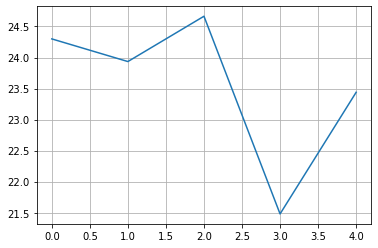

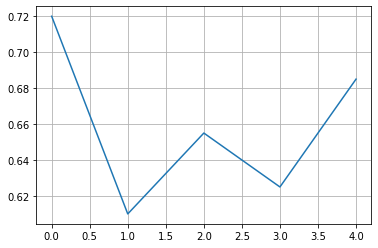

Game number: 001050      Frame number: 00024692  Average reward: 0.7  Time taken: 35.8s  Episode steps: 22.9
Game number: 001100      Frame number: 00026124  Average reward: 0.7  Time taken: 38.3s  Episode steps: 23.0
Game number: 001150      Frame number: 00027273  Average reward: 0.7  Time taken: 31.2s  Episode steps: 23.7
Game number: 001200      Frame number: 00028302  Average reward: 0.6  Time taken: 28.4s  Episode steps: 23.7
Game number: 001250      Frame number: 00029404  Average reward: 0.6  Time taken: 29.0s  Episode steps: 23.6
Game number: 001300      Frame number: 00030630  Average reward: 0.5  Time taken: 34.9s  Episode steps: 22.5
Game number: 001350      Frame number: 00031696  Average reward: 0.5  Time taken: 29.2s  Episode steps: 22.1
Game number: 001400      Frame number: 00032956  Average reward: 0.6  Time taken: 34.4s  Episode steps: 23.3
Game number: 001450      Frame number: 00034208  Average reward: 0.7  Time taken: 34.6s  Episode steps: 24.0
Game number: 001500

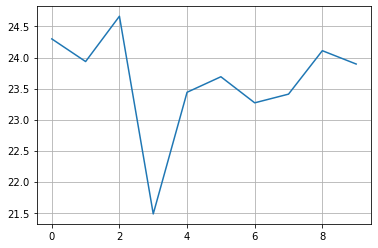

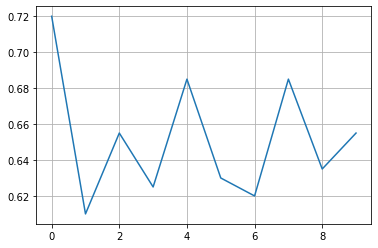

Game number: 002050      Frame number: 00048380  Average reward: 0.6  Time taken: 33.0s  Episode steps: 23.2
Game number: 002100      Frame number: 00049654  Average reward: 0.7  Time taken: 32.6s  Episode steps: 23.8
Game number: 002150      Frame number: 00050643  Average reward: 0.6  Time taken: 28.5s  Episode steps: 22.6
Game number: 002200      Frame number: 00051639  Average reward: 0.6  Time taken: 27.2s  Episode steps: 22.0
Game number: 002250      Frame number: 00052619  Average reward: 0.6  Time taken: 25.9s  Episode steps: 21.2
Game number: 002300      Frame number: 00053788  Average reward: 0.6  Time taken: 31.2s  Episode steps: 20.7
Game number: 002350      Frame number: 00055066  Average reward: 0.6  Time taken: 34.1s  Episode steps: 22.1
Game number: 002400      Frame number: 00056323  Average reward: 0.6  Time taken: 32.1s  Episode steps: 23.4
Game number: 002450      Frame number: 00057626  Average reward: 0.6  Time taken: 31.9s  Episode steps: 25.0
Game number: 002500

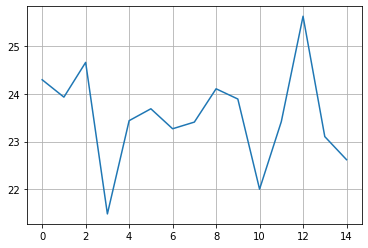

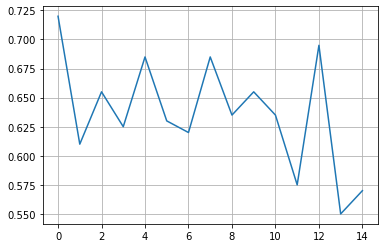

Game number: 003050      Frame number: 00071697  Average reward: 0.5  Time taken: 30.9s  Episode steps: 21.6
Game number: 003100      Frame number: 00072837  Average reward: 0.5  Time taken: 27.8s  Episode steps: 21.8
Game number: 003150      Frame number: 00073868  Average reward: 0.5  Time taken: 29.5s  Episode steps: 21.4
Game number: 003200      Frame number: 00075217  Average reward: 0.6  Time taken: 35.0s  Episode steps: 23.1
Game number: 003250      Frame number: 00076493  Average reward: 0.6  Time taken: 34.9s  Episode steps: 24.0
Game number: 003300      Frame number: 00077699  Average reward: 0.6  Time taken: 31.7s  Episode steps: 24.3
Game number: 003350      Frame number: 00078978  Average reward: 0.6  Time taken: 30.3s  Episode steps: 25.6
Game number: 003400      Frame number: 00080189  Average reward: 0.6  Time taken: 33.5s  Episode steps: 24.9
Game number: 003450      Frame number: 00081485  Average reward: 0.6  Time taken: 33.7s  Episode steps: 25.0
Game number: 003500

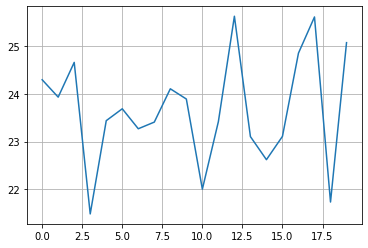

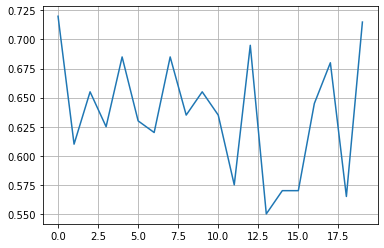

Game number: 004050      Frame number: 00095950  Average reward: 0.8  Time taken: 36.4s  Episode steps: 25.6
Game number: 004100      Frame number: 00097130  Average reward: 0.7  Time taken: 28.8s  Episode steps: 24.6
Game number: 004150      Frame number: 00098145  Average reward: 0.6  Time taken: 26.9s  Episode steps: 23.6
Game number: 004200      Frame number: 00099201  Average reward: 0.6  Time taken: 27.0s  Episode steps: 22.6
Game number: 004250      Frame number: 00100253  Average reward: 0.5  Time taken: 28.0s  Episode steps: 21.5
Game number: 004300      Frame number: 00101309  Average reward: 0.6  Time taken: 28.5s  Episode steps: 20.9
Game number: 004350      Frame number: 00102769  Average reward: 0.7  Time taken: 38.4s  Episode steps: 23.1
Game number: 004400      Frame number: 00103926  Average reward: 0.8  Time taken: 29.3s  Episode steps: 23.6
Game number: 004450      Frame number: 00105110  Average reward: 0.8  Time taken: 30.3s  Episode steps: 24.3
Game number: 004500

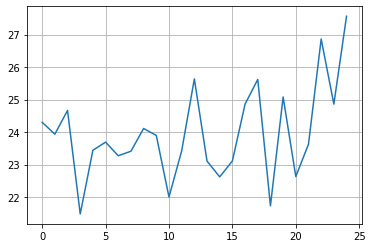

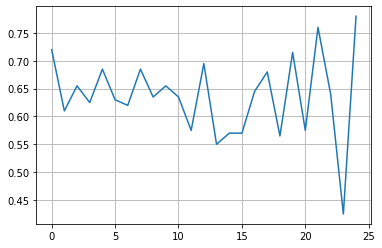

Game number: 005050      Frame number: 00120975  Average reward: 0.7  Time taken: 32.8s  Episode steps: 25.6
Game number: 005100      Frame number: 00122402  Average reward: 0.7  Time taken: 35.7s  Episode steps: 25.1
Game number: 005150      Frame number: 00123626  Average reward: 0.6  Time taken: 31.4s  Episode steps: 25.6
Game number: 005200      Frame number: 00124944  Average reward: 0.6  Time taken: 33.2s  Episode steps: 25.8
Game number: 005250      Frame number: 00126293  Average reward: 0.6  Time taken: 35.5s  Episode steps: 26.6
Game number: 005300      Frame number: 00127465  Average reward: 0.6  Time taken: 29.8s  Episode steps: 25.3
Game number: 005350      Frame number: 00128718  Average reward: 0.6  Time taken: 33.1s  Episode steps: 25.5
Game number: 005400      Frame number: 00130055  Average reward: 0.5  Time taken: 34.9s  Episode steps: 25.6
Game number: 005450      Frame number: 00131724  Average reward: 0.6  Time taken: 43.9s  Episode steps: 27.2
Game number: 005500

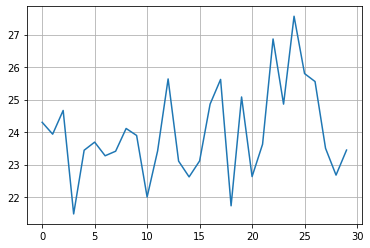

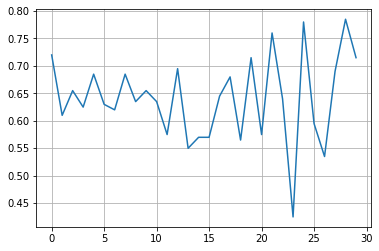

Game number: 006050      Frame number: 00145363  Average reward: 0.8  Time taken: 35.9s  Episode steps: 25.2
Game number: 006100      Frame number: 00146819  Average reward: 0.9  Time taken: 36.8s  Episode steps: 26.6
Game number: 006150      Frame number: 00148187  Average reward: 0.9  Time taken: 35.6s  Episode steps: 27.0
Game number: 006200      Frame number: 00149535  Average reward: 1.1  Time taken: 34.1s  Episode steps: 27.8
Game number: 006250      Frame number: 00150620  Average reward: 1.0  Time taken: 28.5s  Episode steps: 26.3
Game number: 006300      Frame number: 00152170  Average reward: 1.0  Time taken: 37.1s  Episode steps: 26.8
Game number: 006350      Frame number: 00153602  Average reward: 1.1  Time taken: 38.8s  Episode steps: 27.1
Game number: 006400      Frame number: 00155022  Average reward: 1.1  Time taken: 35.7s  Episode steps: 27.4
Game number: 006450      Frame number: 00156132  Average reward: 1.1  Time taken: 29.3s  Episode steps: 27.6
Game number: 006500

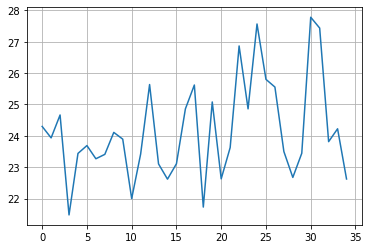

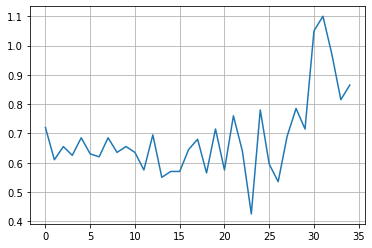

Game number: 007050      Frame number: 00170184  Average reward: 0.9  Time taken: 27.3s  Episode steps: 22.4
Game number: 007100      Frame number: 00171558  Average reward: 1.0  Time taken: 35.9s  Episode steps: 24.4
Game number: 007150      Frame number: 00172946  Average reward: 1.1  Time taken: 36.2s  Episode steps: 24.6
Game number: 007200      Frame number: 00174166  Average reward: 1.2  Time taken: 30.0s  Episode steps: 25.1
Game number: 007250      Frame number: 00175371  Average reward: 1.3  Time taken: 32.0s  Episode steps: 25.9
Game number: 007300      Frame number: 00176733  Average reward: 1.4  Time taken: 33.3s  Episode steps: 25.9
Game number: 007350      Frame number: 00177902  Average reward: 1.4  Time taken: 33.0s  Episode steps: 24.8
Game number: 007400      Frame number: 00178899  Average reward: 1.4  Time taken: 26.9s  Episode steps: 23.7
Game number: 007450      Frame number: 00180495  Average reward: 1.3  Time taken: 40.1s  Episode steps: 25.6
Game number: 007500

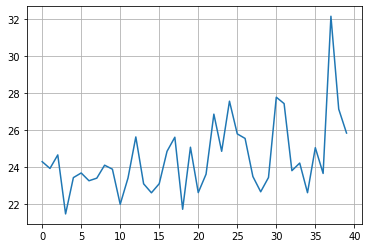

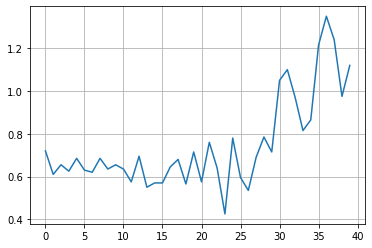

Game number: 008050      Frame number: 00197497  Average reward: 1.0  Time taken: 40.6s  Episode steps: 26.9
Game number: 008100      Frame number: 00198726  Average reward: 1.1  Time taken: 32.3s  Episode steps: 26.3
Game number: 008150      Frame number: 00199904  Average reward: 1.0  Time taken: 29.1s  Episode steps: 25.9
Game number: 008200      Frame number: 00201082  Average reward: 0.8  Time taken: 31.1s  Episode steps: 25.8
Game number: 008250      Frame number: 00202230  Average reward: 0.6  Time taken: 29.7s  Episode steps: 23.7
Game number: 008300      Frame number: 00203443  Average reward: 0.4  Time taken: 31.5s  Episode steps: 23.6
Game number: 008350      Frame number: 00204796  Average reward: 0.4  Time taken: 35.9s  Episode steps: 24.5
Game number: 008400      Frame number: 00206153  Average reward: 0.5  Time taken: 33.1s  Episode steps: 25.4
Game number: 008450      Frame number: 00207350  Average reward: 0.5  Time taken: 31.7s  Episode steps: 25.6
Game number: 008500

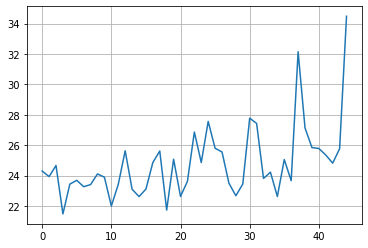

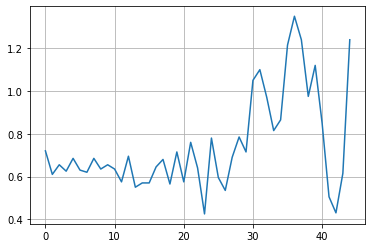

Game number: 009050      Frame number: 00224733  Average reward: 1.5  Time taken: 40.1s  Episode steps: 35.5
Game number: 009100      Frame number: 00225982  Average reward: 1.5  Time taken: 34.0s  Episode steps: 34.3
Game number: 009150      Frame number: 00227506  Average reward: 1.2  Time taken: 37.0s  Episode steps: 30.1
Game number: 009200      Frame number: 00228914  Average reward: 1.0  Time taken: 37.1s  Episode steps: 28.7
Game number: 009250      Frame number: 00230112  Average reward: 0.8  Time taken: 30.3s  Episode steps: 26.9
Game number: 009300      Frame number: 00231979  Average reward: 1.0  Time taken: 46.2s  Episode steps: 30.0
Game number: 009350      Frame number: 00233445  Average reward: 1.0  Time taken: 39.7s  Episode steps: 29.7
Game number: 009400      Frame number: 00234584  Average reward: 0.9  Time taken: 30.7s  Episode steps: 28.4
Game number: 009450      Frame number: 00235826  Average reward: 0.9  Time taken: 32.2s  Episode steps: 28.6
Game number: 009500

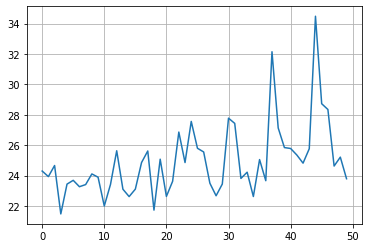

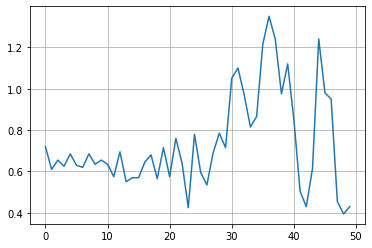

Game number: 010050      Frame number: 00250574  Average reward: 0.4  Time taken: 32.0s  Episode steps: 23.7
Game number: 010100      Frame number: 00252063  Average reward: 0.4  Time taken: 38.9s  Episode steps: 24.9
Game number: 010150      Frame number: 00253283  Average reward: 0.5  Time taken: 30.5s  Episode steps: 26.1
Game number: 010200      Frame number: 00254625  Average reward: 0.5  Time taken: 33.7s  Episode steps: 26.6
Game number: 010250      Frame number: 00256474  Average reward: 0.7  Time taken: 44.9s  Episode steps: 29.5
Game number: 010300      Frame number: 00258630  Average reward: 1.0  Time taken: 60.1s  Episode steps: 32.8
Game number: 010350      Frame number: 00260287  Average reward: 1.3  Time taken: 42.8s  Episode steps: 35.0
Game number: 010400      Frame number: 00261712  Average reward: 1.6  Time taken: 36.3s  Episode steps: 35.4
Game number: 010450      Frame number: 00263761  Average reward: 1.9  Time taken: 55.8s  Episode steps: 36.4
Game number: 010500

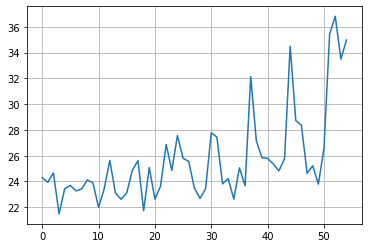

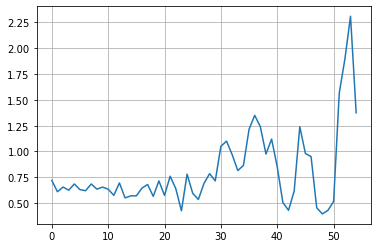

Game number: 011050      Frame number: 00284226  Average reward: 1.0  Time taken: 39.7s  Episode steps: 31.9
Game number: 011100      Frame number: 00285586  Average reward: 1.0  Time taken: 35.1s  Episode steps: 32.0
Game number: 011150      Frame number: 00286655  Average reward: 0.8  Time taken: 26.2s  Episode steps: 30.1
Game number: 011200      Frame number: 00287991  Average reward: 0.6  Time taken: 34.3s  Episode steps: 26.1
Game number: 011250      Frame number: 00289152  Average reward: 0.5  Time taken: 29.1s  Episode steps: 24.6
Game number: 011300      Frame number: 00290270  Average reward: 0.4  Time taken: 29.8s  Episode steps: 23.4
Game number: 011350      Frame number: 00291972  Average reward: 0.5  Time taken: 43.9s  Episode steps: 26.6
Game number: 011400      Frame number: 00294393  Average reward: 1.0  Time taken: 65.9s  Episode steps: 32.0
Game number: 011450      Frame number: 00296018  Average reward: 1.4  Time taken: 41.4s  Episode steps: 34.3
Game number: 011500

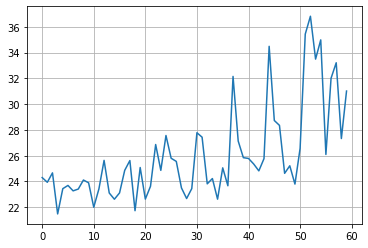

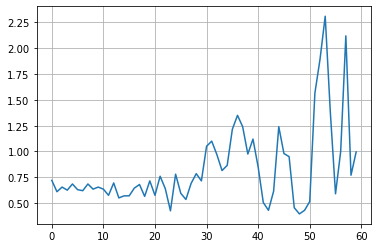

Game number: 012050      Frame number: 00314065  Average reward: 1.0  Time taken: 37.7s  Episode steps: 31.2
Game number: 012100      Frame number: 00315339  Average reward: 1.1  Time taken: 33.3s  Episode steps: 31.2
Game number: 012150      Frame number: 00316631  Average reward: 0.7  Time taken: 32.6s  Episode steps: 27.8
Game number: 012200      Frame number: 00317828  Average reward: 0.7  Time taken: 31.2s  Episode steps: 25.6
Game number: 012250      Frame number: 00319373  Average reward: 0.8  Time taken: 37.0s  Episode steps: 26.5
Game number: 012300      Frame number: 00320809  Average reward: 0.8  Time taken: 38.0s  Episode steps: 27.4
Game number: 012350      Frame number: 00322275  Average reward: 0.8  Time taken: 35.5s  Episode steps: 28.2
Game number: 012400      Frame number: 00323509  Average reward: 0.8  Time taken: 32.9s  Episode steps: 28.4
Game number: 012450      Frame number: 00324708  Average reward: 0.7  Time taken: 29.6s  Episode steps: 26.7
Game number: 012500

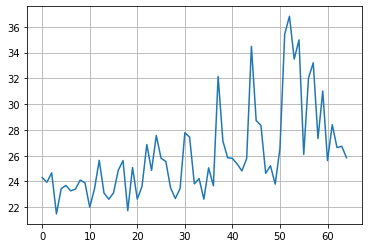

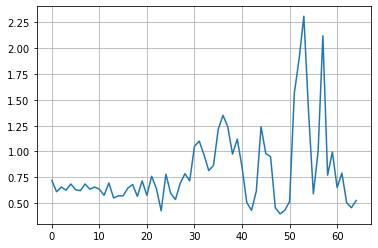

Game number: 013050      Frame number: 00340705  Average reward: 0.5  Time taken: 36.6s  Episode steps: 26.7
Game number: 013100      Frame number: 00342070  Average reward: 0.5  Time taken: 33.1s  Episode steps: 27.1
Game number: 013150      Frame number: 00343365  Average reward: 0.5  Time taken: 35.4s  Episode steps: 28.1
Game number: 013200      Frame number: 00344413  Average reward: 0.4  Time taken: 26.8s  Episode steps: 25.3
Game number: 013250      Frame number: 00345632  Average reward: 0.4  Time taken: 31.6s  Episode steps: 24.6
Game number: 013300      Frame number: 00347032  Average reward: 0.5  Time taken: 35.9s  Episode steps: 24.8
Game number: 013350      Frame number: 00348491  Average reward: 0.5  Time taken: 35.6s  Episode steps: 25.6
Game number: 013400      Frame number: 00349891  Average reward: 0.5  Time taken: 34.7s  Episode steps: 27.4
Game number: 013450      Frame number: 00351182  Average reward: 0.5  Time taken: 32.9s  Episode steps: 27.8
Game number: 013500

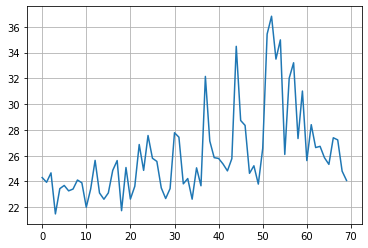

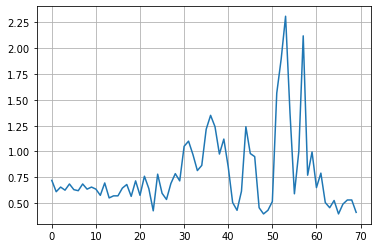

Game number: 014050      Frame number: 00366275  Average reward: 0.4  Time taken: 32.6s  Episode steps: 23.6
Game number: 014100      Frame number: 00367759  Average reward: 0.4  Time taken: 34.4s  Episode steps: 23.9
Game number: 014150      Frame number: 00369137  Average reward: 0.5  Time taken: 36.7s  Episode steps: 25.5
Game number: 014200      Frame number: 00370407  Average reward: 0.5  Time taken: 30.3s  Episode steps: 26.5
Game number: 014250      Frame number: 00371678  Average reward: 0.4  Time taken: 33.2s  Episode steps: 27.0
Game number: 014300      Frame number: 00373031  Average reward: 0.4  Time taken: 34.4s  Episode steps: 26.4
Game number: 014350      Frame number: 00374246  Average reward: 0.4  Time taken: 29.9s  Episode steps: 25.5
Game number: 014400      Frame number: 00375476  Average reward: 0.4  Time taken: 32.0s  Episode steps: 25.3
Game number: 014450      Frame number: 00376951  Average reward: 0.5  Time taken: 36.6s  Episode steps: 26.4
Game number: 014500

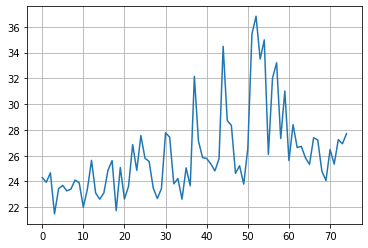

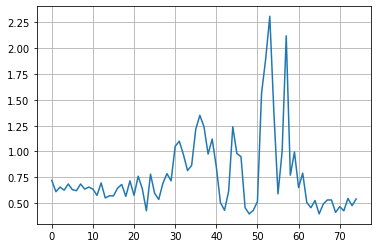

Game number: 015050      Frame number: 00393244  Average reward: 0.6  Time taken: 38.7s  Episode steps: 28.7
Game number: 015100      Frame number: 00394877  Average reward: 0.6  Time taken: 39.3s  Episode steps: 29.6
Game number: 015150      Frame number: 00396479  Average reward: 0.6  Time taken: 39.7s  Episode steps: 30.2
Game number: 015200      Frame number: 00397768  Average reward: 0.6  Time taken: 32.6s  Episode steps: 29.6
Game number: 015250      Frame number: 00399052  Average reward: 0.6  Time taken: 32.2s  Episode steps: 29.0
Game number: 015300      Frame number: 00400545  Average reward: 0.5  Time taken: 37.6s  Episode steps: 28.3
Game number: 015350      Frame number: 00401935  Average reward: 0.5  Time taken: 35.2s  Episode steps: 27.3
Game number: 015400      Frame number: 00403062  Average reward: 0.4  Time taken: 30.6s  Episode steps: 26.5
Game number: 015450      Frame number: 00404613  Average reward: 0.5  Time taken: 37.6s  Episode steps: 27.8
Game number: 015500

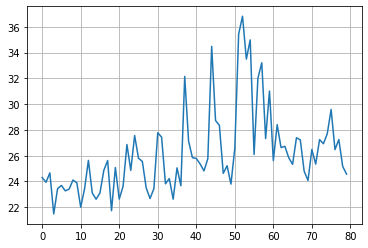

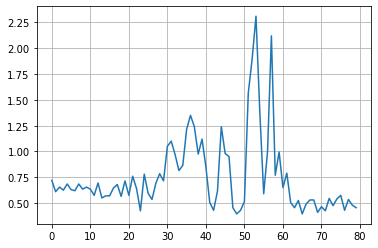

Game number: 016050      Frame number: 00419883  Average reward: 0.5  Time taken: 37.1s  Episode steps: 25.3
Game number: 016100      Frame number: 00421370  Average reward: 0.5  Time taken: 37.8s  Episode steps: 27.1
Game number: 016150      Frame number: 00422744  Average reward: 0.5  Time taken: 33.6s  Episode steps: 28.6
Game number: 016200      Frame number: 00424097  Average reward: 0.5  Time taken: 34.6s  Episode steps: 28.2
Game number: 016250      Frame number: 00425281  Average reward: 0.5  Time taken: 30.8s  Episode steps: 27.0
Game number: 016300      Frame number: 00426562  Average reward: 0.5  Time taken: 32.9s  Episode steps: 26.0
Game number: 016350      Frame number: 00427793  Average reward: 0.4  Time taken: 31.4s  Episode steps: 25.2
Game number: 016400      Frame number: 00429276  Average reward: 0.5  Time taken: 37.5s  Episode steps: 25.9
Game number: 016450      Frame number: 00430552  Average reward: 0.5  Time taken: 32.6s  Episode steps: 26.4
Game number: 016500

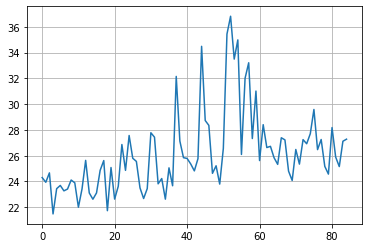

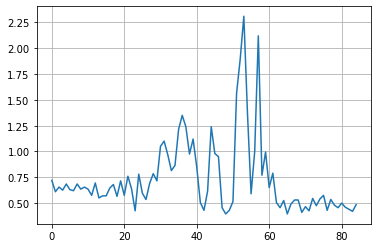

Game number: 017050      Frame number: 00446483  Average reward: 0.5  Time taken: 34.4s  Episode steps: 26.9
Game number: 017100      Frame number: 00448034  Average reward: 0.5  Time taken: 38.6s  Episode steps: 27.9
Game number: 017150      Frame number: 00449219  Average reward: 0.5  Time taken: 31.2s  Episode steps: 27.1
Game number: 017200      Frame number: 00450507  Average reward: 0.5  Time taken: 30.9s  Episode steps: 26.6
Game number: 017250      Frame number: 00451793  Average reward: 0.5  Time taken: 34.0s  Episode steps: 26.6
Game number: 017300      Frame number: 00453172  Average reward: 0.4  Time taken: 33.5s  Episode steps: 25.7
Game number: 017350      Frame number: 00454636  Average reward: 0.5  Time taken: 38.4s  Episode steps: 27.1
Game number: 017400      Frame number: 00455791  Average reward: 0.4  Time taken: 29.5s  Episode steps: 26.4
Game number: 017450      Frame number: 00457030  Average reward: 0.4  Time taken: 32.2s  Episode steps: 26.2
Game number: 017500

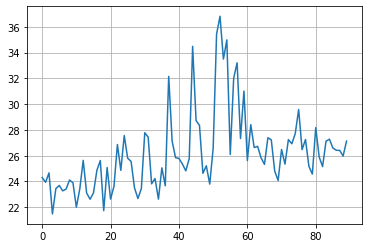

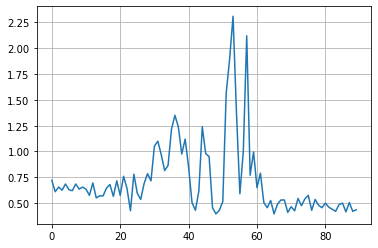

Game number: 018050      Frame number: 00473005  Average reward: 0.5  Time taken: 34.7s  Episode steps: 27.0
Game number: 018100      Frame number: 00474141  Average reward: 0.6  Time taken: 29.3s  Episode steps: 26.8
Game number: 018150      Frame number: 00475248  Average reward: 0.5  Time taken: 31.0s  Episode steps: 25.2
Game number: 018200      Frame number: 00476575  Average reward: 0.5  Time taken: 32.5s  Episode steps: 24.4
Game number: 018250      Frame number: 00477848  Average reward: 0.4  Time taken: 33.9s  Episode steps: 24.2
Game number: 018300      Frame number: 00479232  Average reward: 0.5  Time taken: 32.7s  Episode steps: 25.5
Game number: 018350      Frame number: 00480400  Average reward: 0.5  Time taken: 31.1s  Episode steps: 25.8
Game number: 018400      Frame number: 00481596  Average reward: 0.5  Time taken: 30.4s  Episode steps: 25.1
Game number: 018450      Frame number: 00482941  Average reward: 0.5  Time taken: 34.2s  Episode steps: 25.5
Game number: 018500

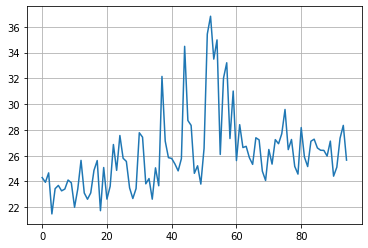

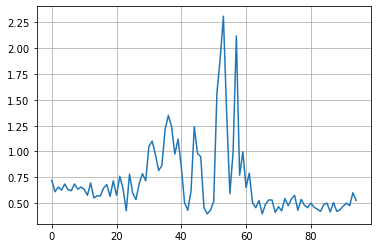

Game number: 019050      Frame number: 00499248  Average reward: 0.5  Time taken: 34.8s  Episode steps: 25.9
Game number: 019100      Frame number: 00500385  Average reward: 0.5  Time taken: 28.9s  Episode steps: 25.1
Game number: 019150      Frame number: 00501450  Average reward: 0.6  Time taken: 27.9s  Episode steps: 24.7
Game number: 019200      Frame number: 00502906  Average reward: 0.6  Time taken: 36.1s  Episode steps: 25.2
Game number: 019250      Frame number: 00504057  Average reward: 0.5  Time taken: 30.9s  Episode steps: 24.0
Game number: 019300      Frame number: 00505318  Average reward: 0.5  Time taken: 30.0s  Episode steps: 24.7
Game number: 019350      Frame number: 00506760  Average reward: 0.5  Time taken: 38.3s  Episode steps: 26.6
Game number: 019400      Frame number: 00508027  Average reward: 0.5  Time taken: 31.8s  Episode steps: 25.6
Game number: 019450      Frame number: 00509414  Average reward: 0.5  Time taken: 36.1s  Episode steps: 26.8
Game number: 019500

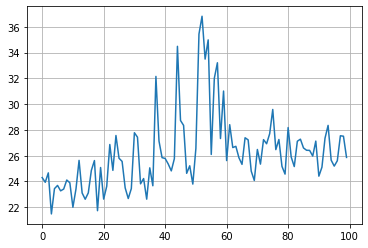

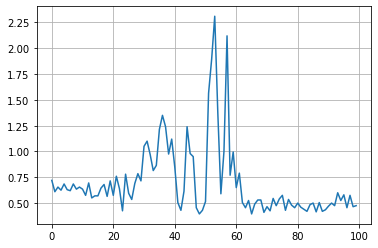

Game number: 020050      Frame number: 00525499  Average reward: 0.4  Time taken: 33.2s  Episode steps: 25.7
Game number: 020100      Frame number: 00526790  Average reward: 0.4  Time taken: 34.5s  Episode steps: 25.7
Game number: 020150      Frame number: 00528109  Average reward: 0.4  Time taken: 31.6s  Episode steps: 26.2
Game number: 020200      Frame number: 00529475  Average reward: 0.5  Time taken: 36.1s  Episode steps: 26.3
Game number: 020250      Frame number: 00530546  Average reward: 0.5  Time taken: 26.8s  Episode steps: 25.2
Game number: 020300      Frame number: 00531961  Average reward: 0.5  Time taken: 36.4s  Episode steps: 25.9
Game number: 020350      Frame number: 00533410  Average reward: 0.5  Time taken: 38.7s  Episode steps: 26.5
Game number: 020400      Frame number: 00534661  Average reward: 0.5  Time taken: 29.3s  Episode steps: 25.9
Game number: 020450      Frame number: 00535900  Average reward: 0.4  Time taken: 32.9s  Episode steps: 26.8
Game number: 020500

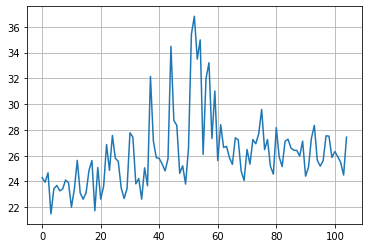

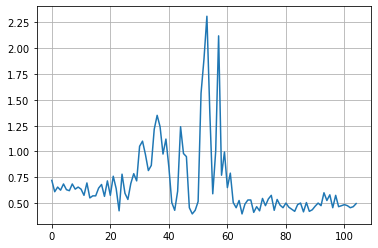

Game number: 021050      Frame number: 00551371  Average reward: 0.5  Time taken: 31.1s  Episode steps: 27.6
Game number: 021100      Frame number: 00552655  Average reward: 0.5  Time taken: 33.1s  Episode steps: 25.7
Game number: 021150      Frame number: 00554089  Average reward: 0.5  Time taken: 35.9s  Episode steps: 26.4
Game number: 021200      Frame number: 00555398  Average reward: 0.5  Time taken: 34.1s  Episode steps: 26.3
Game number: 021250      Frame number: 00556920  Average reward: 0.5  Time taken: 36.2s  Episode steps: 27.7
Game number: 021300      Frame number: 00558115  Average reward: 0.5  Time taken: 32.5s  Episode steps: 27.3
Game number: 021350      Frame number: 00559436  Average reward: 0.5  Time taken: 33.6s  Episode steps: 26.7
Game number: 021400      Frame number: 00560521  Average reward: 0.4  Time taken: 27.2s  Episode steps: 25.6
Game number: 021450      Frame number: 00561955  Average reward: 0.4  Time taken: 37.0s  Episode steps: 25.2
Game number: 021500

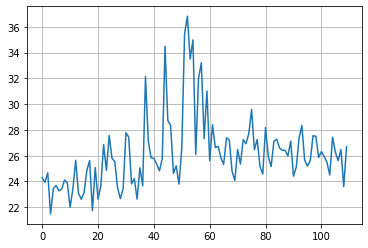

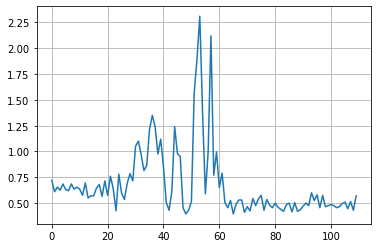

Game number: 022050      Frame number: 00577074  Average reward: 0.5  Time taken: 31.1s  Episode steps: 26.4
Game number: 022100      Frame number: 00578489  Average reward: 0.5  Time taken: 36.9s  Episode steps: 27.5
Game number: 022150      Frame number: 00579624  Average reward: 0.4  Time taken: 27.4s  Episode steps: 25.9
Game number: 022200      Frame number: 00580729  Average reward: 0.3  Time taken: 29.2s  Episode steps: 24.3
Game number: 022250      Frame number: 00581812  Average reward: 0.4  Time taken: 26.6s  Episode steps: 23.7
Game number: 022300      Frame number: 00583057  Average reward: 0.4  Time taken: 32.7s  Episode steps: 22.8
Game number: 022350      Frame number: 00584368  Average reward: 0.4  Time taken: 34.4s  Episode steps: 23.7
Game number: 022400      Frame number: 00585692  Average reward: 0.4  Time taken: 34.4s  Episode steps: 24.8
Game number: 022450      Frame number: 00587017  Average reward: 0.4  Time taken: 32.0s  Episode steps: 26.0
Game number: 022500

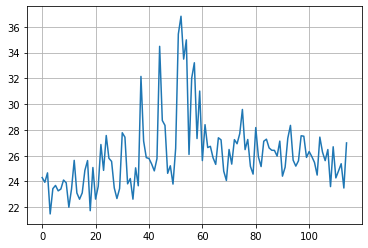

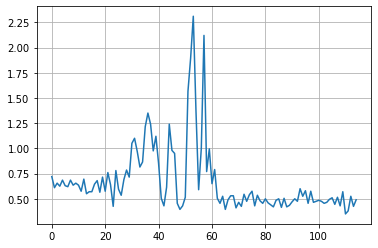

Game number: 023050      Frame number: 00602293  Average reward: 0.4  Time taken: 39.7s  Episode steps: 26.8
Game number: 023100      Frame number: 00603934  Average reward: 0.5  Time taken: 42.3s  Episode steps: 29.0
Game number: 023150      Frame number: 00605159  Average reward: 0.4  Time taken: 30.6s  Episode steps: 27.4
Game number: 023200      Frame number: 00606322  Average reward: 0.4  Time taken: 29.2s  Episode steps: 27.3
Game number: 023250      Frame number: 00607794  Average reward: 0.5  Time taken: 37.4s  Episode steps: 27.5
Game number: 023300      Frame number: 00608840  Average reward: 0.5  Time taken: 27.9s  Episode steps: 24.5
Game number: 023350      Frame number: 00610455  Average reward: 0.5  Time taken: 40.2s  Episode steps: 26.5
Game number: 023400      Frame number: 00611690  Average reward: 0.6  Time taken: 32.6s  Episode steps: 26.8
Game number: 023450      Frame number: 00613341  Average reward: 0.6  Time taken: 40.9s  Episode steps: 27.7
Game number: 023500

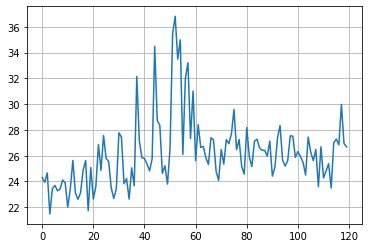

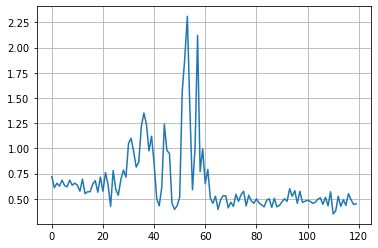

Game number: 024050      Frame number: 00629642  Average reward: 0.4  Time taken: 34.2s  Episode steps: 26.7
Game number: 024100      Frame number: 00631098  Average reward: 0.4  Time taken: 35.2s  Episode steps: 26.1
Game number: 024150      Frame number: 00632460  Average reward: 0.4  Time taken: 35.3s  Episode steps: 26.9
Game number: 024200      Frame number: 00633541  Average reward: 0.5  Time taken: 28.5s  Episode steps: 25.6
Game number: 024250      Frame number: 00634915  Average reward: 0.5  Time taken: 33.7s  Episode steps: 26.4
Game number: 024300      Frame number: 00636398  Average reward: 0.5  Time taken: 38.8s  Episode steps: 26.5
Game number: 024350      Frame number: 00637558  Average reward: 0.4  Time taken: 27.9s  Episode steps: 25.5
Game number: 024400      Frame number: 00638756  Average reward: 0.4  Time taken: 30.6s  Episode steps: 26.1
Game number: 024450      Frame number: 00640018  Average reward: 0.4  Time taken: 30.9s  Episode steps: 25.5
Game number: 024500

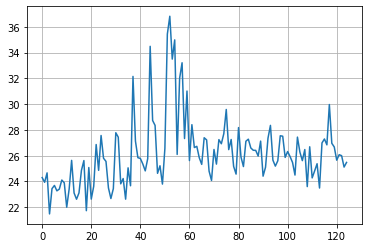

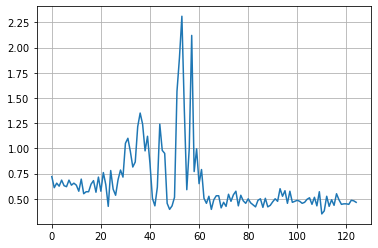

Game number: 025050      Frame number: 00655317  Average reward: 0.5  Time taken: 34.4s  Episode steps: 24.4
Game number: 025100      Frame number: 00656580  Average reward: 0.5  Time taken: 31.6s  Episode steps: 25.0
Game number: 025150      Frame number: 00657906  Average reward: 0.5  Time taken: 32.4s  Episode steps: 25.7
Game number: 025200      Frame number: 00659120  Average reward: 0.6  Time taken: 31.4s  Episode steps: 25.2
Game number: 025250      Frame number: 00660403  Average reward: 0.6  Time taken: 35.1s  Episode steps: 25.4
Game number: 025300      Frame number: 00661668  Average reward: 0.6  Time taken: 31.9s  Episode steps: 25.4
Game number: 025350      Frame number: 00662667  Average reward: 0.5  Time taken: 26.3s  Episode steps: 23.8
Game number: 025400      Frame number: 00663860  Average reward: 0.5  Time taken: 30.3s  Episode steps: 23.7
Game number: 025450      Frame number: 00665075  Average reward: 0.4  Time taken: 31.5s  Episode steps: 23.4
Game number: 025500

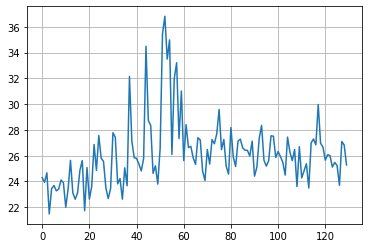

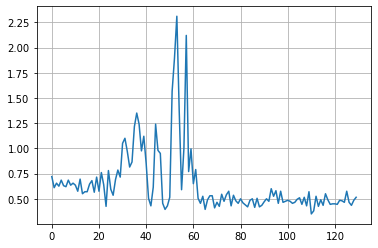

KeyboardInterrupt: ignored

In [ ]:
my_reward = CustomReward(*reward_args)
t1 = time.time()
frame_number = 0
episode_reward_list = []
loss_list = []
episode_steps_list = []
no_update_epoch = 0
full_states = np.array([], dtype=np.float32).reshape(0,*input_shape)
full_actions = np.array([], dtype=np.float32).reshape(0)
full_disc_rewards = np.array([], dtype=np.float32).reshape(0)
action_list = np.zeros((4))

for epochs in range(NUM_EPOCHS):
  if len(episode_reward_list)%SAVE_FREQ_EP== 0 and len(episode_reward_list)>1:
    savetxt(SAVE_DIRR+'rewards_list_2.csv', np.asarray(episode_reward_list), delimiter=',')
    savetxt(SAVE_DIRR+'steps_list_2.csv', np.asarray(episode_steps_list), delimiter=',')
    agent.actor.save(SAVE_DIRR+'actor_2.h5')
    agent.critic.save(SAVE_DIRR+'critic_2.h5')
    print('saved')
    print(action_list)
    action_list = np.zeros((4))
    plot_progress(episode_steps_list,f=200)
    plot_progress(episode_reward_list,f=200)
  # if len(episode_reward_list)%OPONENT_UPDATE_EPOCHS==0:
  #   env = make("hungry_geese", debug=False)
  #   agent_kag1 = Agent_kag()
  #   agent1.actor.set_weights(agent.actor.get_weights())
  #   agent1.critic.set_weights(agent.critic.get_weights())
  #   agent2.actor.set_weights(agent.actor.get_weights())
  #   agent2.critic.set_weights(agent.critic.get_weights())
  #   agent3.actor.set_weights(agent.actor.get_weights())
  #   agent3.critic.set_weights(agent.critic.get_weights())
  #   trainer = env.train([None,  agent1.play,  agent2.play, agent_kag1.play])
  #   conf = env.configuration
  obs = trainer.reset()
  state = np.zeros((input_shape))
  new_frame = transform_observation2(obs,conf)
  state = np.append(state[:, :, 3:], new_frame, axis=2)
  episode_reward = 0
  prev_action = 5
  episode_steps=0

  rewards = []
  states = []
  actions = []
  for _ in range(MAX_EPISODE_LENGTH):
    
    episode_steps+= 1
    frame_number += 1
    action = agent.get_action(state)
    action_list[action] = action_list[action] +1
    obs, reward, terminal, info = trainer.step(action_num_to_name(correct_action(action,prev_action)))
    reward = my_reward.get_reward(obs,terminal)
    new_frame = transform_observation2(obs,conf)
    new_state = np.append(state[:, :, 3:], new_frame, axis=2)

    states.append(state)
    actions.append(action)
    rewards.append(reward)

    episode_reward += reward
    state = new_state
    prev_action = correct_action(action,prev_action)

    if terminal and no_update_epoch>=UPDATE_EPOCHS or full_states.shape[0]>MAX_BATCH_SIZE:
      states, actions, discounted_rewards = reward_preprocess(states, actions, rewards, GAMMA)
      full_states = np.concatenate((full_states,states),axis = 0)
      full_actions = np.concatenate((full_actions,actions),axis = 0)
      full_disc_rewards = np.concatenate((full_disc_rewards,discounted_rewards),axis = 0)
      agent.learn(full_states, full_actions, full_disc_rewards)
      full_states = np.array([], dtype=np.float32).reshape(0,*input_shape)
      full_actions = np.array([], dtype=np.float32).reshape(0)
      full_disc_rewards = np.array([], dtype=np.float32).reshape(0)
      my_reward.reset()
      no_update_epoch = 0
      break
    elif terminal:
      states, actions, discounted_rewards = reward_preprocess(states, actions, rewards, GAMMA)
      full_states = np.concatenate((full_states,states),axis = 0)
      full_actions = np.concatenate((full_actions,actions),axis = 0)
      full_disc_rewards = np.concatenate((full_disc_rewards,discounted_rewards),axis = 0)

      no_update_epoch += 1
      my_reward.reset()
      break

  
  episode_reward_list.append(episode_reward)
  episode_steps_list.append(episode_steps)

  if len(episode_reward_list) % 50 == 0 and len(episode_reward_list)!=0: 
    # logging.info('worker ',self.name)
    print(f'Game number: {str(len(episode_reward_list)).zfill(6)}  \
    Frame number: {str(frame_number).zfill(8)}  Average reward: {np.mean(episode_reward_list[-200:]):0.1f}  Time taken: {(time.time() - t1):.1f}s  Episode steps: {np.mean(episode_steps_list[-200:]):0.1f}'  )
    # plt.plot(rewards_list)
    # plt.show()
    t1 = time.time()

In [ ]:
+,v =  agent.critic(full_states,training=True)

NameError: ignored

In [ ]:
full_states.shape

(2266, 7, 11, 6)

In [ ]:
# update_lock = None

# global_actor = build_Torus_network(n_actions, learning_rate=LEARNING_RATE,last_activation='softmax')
# global_critic = build_Torus_network(1, learning_rate=LEARNING_RATE)
# global_agent = Agent(global_actor ,global_critic,n_actions,GAMMA,update_lock,SAVE_DIRR)

# global_actor2 = build_Torus_network(n_actions, learning_rate=LEARNING_RATE,last_activation='softmax')
# global_critic2 = build_Torus_network(1, learning_rate=LEARNING_RATE)
# global_agent2 = Agent(global_actor2 ,global_critic2,n_actions,GAMMA,update_lock,SAVE_DIRR)

env = make("hungry_geese", debug=True)
env.run([base_agent4,  base_agent1,  base_agent3,  agent_kag1.play])
env.render(mode="ipython",)

Body Hit: (3, <Action.WEST: 4>, 53, [54, 65, 64, 53, 42, 31])
Body Hit: (0, <Action.NORTH: 1>, 68, [2, 13, 24, 23, 12, 1, 67, 68])


In [ ]:
import logging
import threading
import time

def thread_function(name):
    print("Thread %s: starting", name)
    time.sleep(2)
    print("Thread %s: finishing", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")

    print("Main    : before creating thread")
    x = threading.Thread(target=thread_function, args=(1,))
    print("Main    : before running thread")
    x.start()
    print("Main    : wait for the thread to finish")
    # x.join()
    print("Main    : all done")

In [ ]:
print(50)


ValueError: ignored

In [ ]:
def f(a,b,c):
  print(a+b+c)

In [ ]:
arg = (1,2,3)
f(*arg)

TypeError: ignored

In [ ]:
import time
time.sleep(5)
print(50)

50


In [ ]:
global_game_count

10

In [ ]:
update_lock.locked_lock

<function lock.locked_lock>